# Working with Time Series:

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
 from dateutil import parser
 date = parser.parse("4th of July, 2015")
 date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
date.strftime('%A')

'Saturday'

In [4]:
 import numpy as np
 date = np.array('2015-07-04', dtype=np.datetime64)
 date

array('2015-07-04', dtype='datetime64[D]')

In [5]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [6]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [7]:
np.datetime64('2015-07-04 12:00')


numpy.datetime64('2015-07-04T12:00')

In [10]:
 import pandas as pd
 index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
 '2015-07-04', '2015-08-04'])
 data = pd.Series([0, 1, 2, 3], index=index)
 data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [11]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [12]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [13]:
 dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
 '2015-Jul-6', '07-07-2015', '20150708'])
 dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [14]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [18]:

 from pandas_datareader import data
 goog = data.DataReader('GOOG', start='2004', end='2016',data_source='google')
 goog.head()

NotImplementedError: data_source='google' is not implemented

In [20]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 31920    0 31920    0     0  12475      0 --:--:--  0:00:02 --:--:-- 12478
100  383k    0  383k    0     0   109k      0 --:--:--  0:00:03 --:--:--  109k
100  991k    0  991k    0     0   219k      0 --:--:--  0:00:04 --:--:--  219k
100 1806k    0 1806k    0     0   327k      0 --:--:--  0:00:05 --:--:--  416k
100 2670k    0 2670k    0     0   409k      0 --:--:--  0:00:06 --:--:--  621k
100 2836k    0 2836k    0     0   423k      0 --:--:--  0:00:06 --:--:--  676k


In [21]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [23]:
data.columns = ['West', 'East',"Total"]
data['Total'] = data.eval('West + East')

In [24]:
data.dropna().describe()


,West,East,Total
count,91210.000000,91210.000000,91210.000000
mean,105.603859,47.193882,152.797741
std,133.270779,60.779588,189.959429
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,19.000000
50%,58.000000,26.000000,85.000000
75%,142.000000,65.000000,207.000000
max,1097.000000,698.000000,1569.000000


In [28]:
%matplotlib inline
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

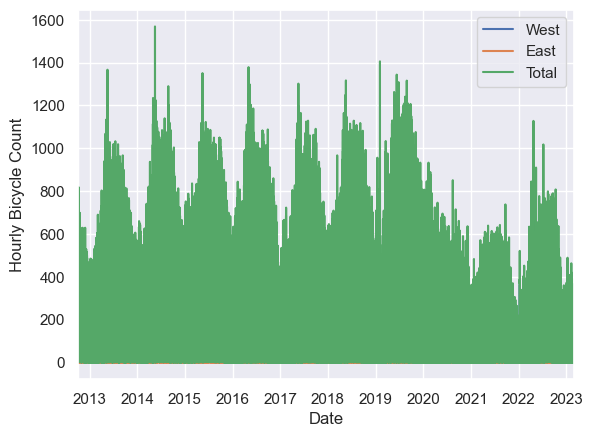

In [29]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

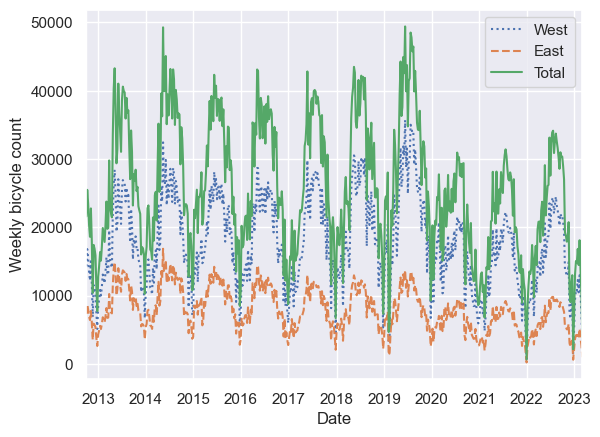

In [30]:
 weekly = data.resample('W').sum()
 weekly.plot(style=[':', '--', '-'])
 plt.ylabel('Weekly bicycle count');

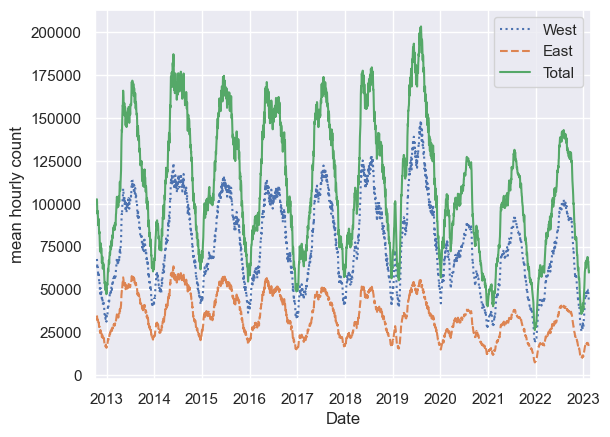

In [31]:
 daily = data.resample('D').sum()
 daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
 plt.ylabel('mean hourly count');

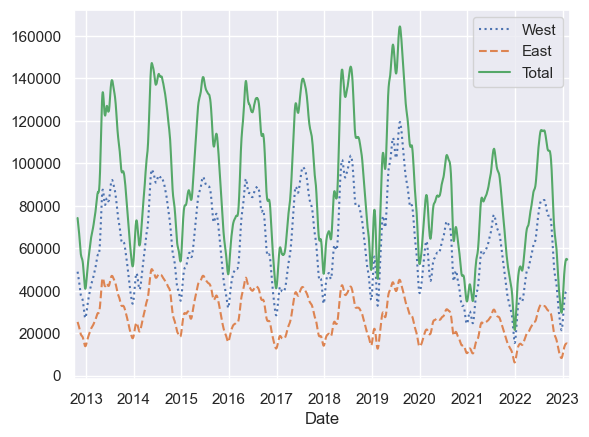

In [32]:
daily.rolling(50, center=True,
 win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);


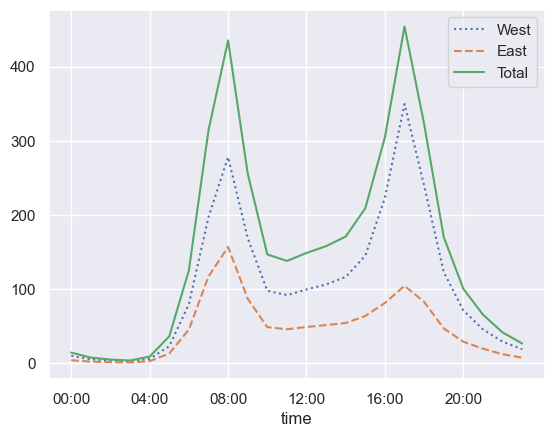

In [33]:
 by_time = data.groupby(data.index.time).mean()
 hourly_ticks = 4 * 60 * 60 * np.arange(6)
 by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

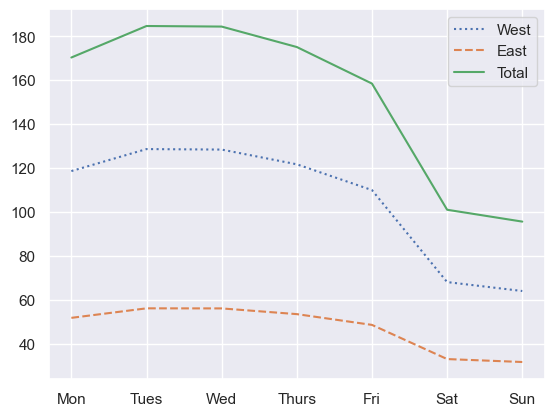

In [34]:
 by_weekday = data.groupby(data.index.dayofweek).mean()
 by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
 by_weekday.plot(style=[':', '--', '-']);


In [35]:
 weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
 by_time = data.groupby([weekend, data.index.time]).mean()

AttributeError: 'DataFrame' object has no attribute 'ix'

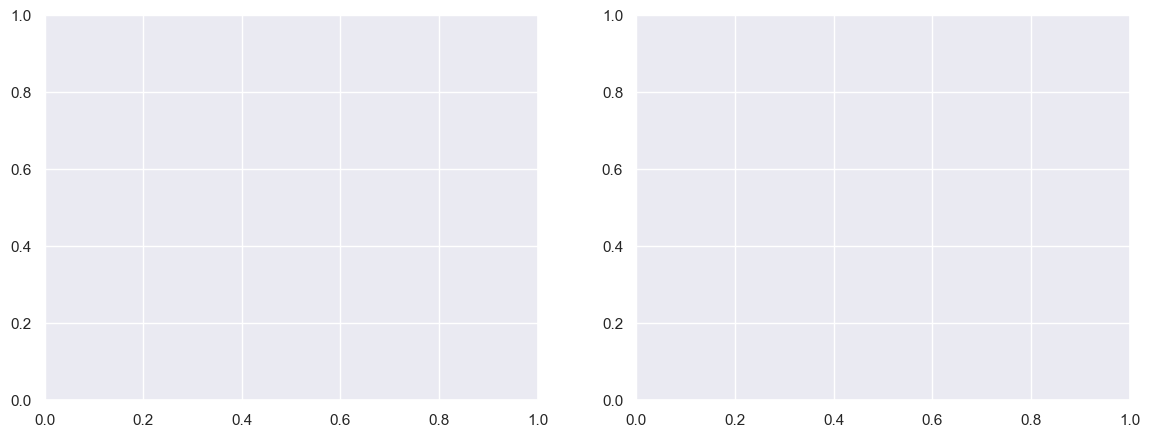

In [39]:
 import matplotlib.pyplot as plt
 fig, ax = plt.subplots(1, 2, figsize=(14, 5))
 by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
 xticks=hourly_ticks, style=[':', '--', '-'])
 by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
 xticks=hourly_ticks, style=[':', '--', '-']);